# <center>Writeup</center>

#### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project includes the following files:
* model.py containing the script to create and train the model
* drive.py (modified) for driving the car in autonomous mode
* model.h5 containing a trained convolution neural network 
* writeup_report.ipynb and writeup_report.pdf summarizing the results


#### 2. Submission includes functional code
Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing 
``` 
python drive.py model.h5
```

I had reduce the throttle to 0.09 and even more during the curve. my mac is old and I observer slow response between drive.py andthe simulator.
High throttle was making car off the curve and rive zipzag.


## Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

I started with Lenet Architecture but landup using nvidia architecture for convolution neural network. I followed nvidia documentation as it is for this project. I used 5 convolution with 3x3 filter sizes and depths between 32 and 64 (model.py lines 524-556). Did subsampling [2,2] in first 3 layers. I also got 5 fully connected layers of size 1164, 100, 50, 10,1. Relu Activation was called in all layers except last two layers.

The model includes RELU layers to introduce nonlinearity (code line 529, 531, 533, 543, 548, 552), and the data is normalized in the model using a Keras lambda layer (code line 526).

#### 2. Attempts to reduce overfitting in the model

The model contains 2 dropout layers in order to reduce overfitting (model.py lines 542, 547). 

The model was trained and validated on different data sets to ensure that the model was not overfitting (code line 541-548). The model was tested by running it through the simulator on track1 and ensuring that the vehicle could stay on the track, except one spot - curve by the lake. Two tires right side went over yellow line but it recovered.

#### 3. Model parameter tuning

The model used an adam optimizer as it is. No learning rate was provided. (model.py line 594).


#### 4. Appropriate training data

Training data was chosen to keep the vehicle driving on the road. I used a combination of center lane driving, recovering from the left and right sides of the road ... 

For details about how I created the training data, see the next section. 

### Model Architecture and Training Strategy


### 1. Solution Design Approach

The overall strategy for deriving a model architecture was to cleanup data, do least augumentation, design convolution neural network and run the car perfectly in the simulator on track1 atleast. ...

My first step was to use a Lenet convolution neural network model similar to what we learned during Traffic Sign classifier. Then I saw the video of nvidia CNN which got me intrigued and I thought this model might be appropriate because nvidia already got it working. I should try to follow in their footsteps also.

In order to gauge how well the model was working, I split my image and steering angle data into a training and validation set using 80-20 ratio. I found that my first model had a low mean squared error on the training set but a high mean squared error on the validation set. This implied that the model was overfitting. 

To combat the overfitting, I started studing the training data I collected. I noticed maximum data is collected around 0 degree. I wrote two method for cutting down the excess of 0 degree training. In first method I used threhsold of maximum of 300 center images per unique steering angle. For example if zero steering had 4000 images, I random picked 300 out of 4000 images. In the second method - I used logic if one steering angle is captured continously, limit it to 5 steeringI modified but didnt use this approach in the final run. 
Original Data histcount
<img src="hist1.png" />
After doing data downsampling and data augmenation
<img src="hist2.png" />

I used center, left and right image for left and right image, I added or subtracted offset from the steering angle.

Then I did data augumentation as per nvidia documenation. Data augmentation consisted of random rotation and wrap affine using opencv only. I used rotation (0.05 degree) and translation (0.09). I didnt have to do flipping and brightness adjustment, since I was focusing on track1 only.

The final step was to run the simulator to see how well the car was driving around track one. Car stayed within the track most of the time, except one spot by the lake but it recovered. To improve the driving behavior in these cases, I had to increase the dropout value

At the end of the process, the vehicle is able to drive autonomously around the track. Also including youtube <a href="https://youtu.be/HcibQAIM6jI">link</a> of the driving.

### 2. Final Model Architecture
The final model architecture (model.py lines 524-556) consisted of a convolution neural network with the following layers and layer sizes ...

<img src="model.png" />
<img src="cnn.png" />


#### 3. Creation of the Training Set & Training Process

Well creating data was fun. Though I use my macbook pro for programming but for creating training data I used my windows laptop with the joystick. 

1> I created driving_csv.log under the project directory and IMG folder had the images
I captured 3 runs of normal driving in the middle. One driving in the opposite direct. 
Two recovery laps. I spent almost 10 days training this data and car will drive perfectly fine till the end of the bridge and 
then at the curve, it will go off on the dirt and wont recover. I learned my lesson, after this I started capturing each recording in a separate directory.

2> I captured CAR2 directory to capture hard turns on the bridge. I didnt use in the final working code. It was causing car to drive in a zigzag way.

3> I captured CAR3 directory to go in the opposite direction again. I didnt use it in the final working code. 

4> I captured CAR4 directory to hard turns at the first curve after the bridge. I used arrow keys on the keyboard to capture hard turn. These samples werent enough, car was still going off on the dirt after the bridge near the first curver.

5> I captured CAR5 directory, identical to CAR4. This helped car to turn on the curve after the bridge.

6> I captured CAR6 directory to capture hard turns at the second curve after the bridge. Use arrow keys on the keyboaird to captur this

7> I had to ditch my own training data in Step1 because I couldnt get car driving properly. I think driving in reverse messed it up. I switched to udacity sample dataset.

Some sample images
<table border="0">
<tr>
<td>
<img src="data/IMG/center_2016_12_01_13_31_13_482.jpg" />
</td>
<td>
<img src="data/IMG/left_2016_12_01_13_31_13_482.jpg" />
</td>
<td>
<img src="data/IMG/right_2016_12_01_13_31_13_482.jpg" />
</td>
</tr>
<tr>
<td>center</td>
<td>left</td>
<td>right</td>
</tr>
</table>

I randomly shuffled the data set and put 20% of the data into a validation set. 

After the collection process and downsampling, I had 3485 number of data points. In the model then I preprocessed this data by cropping 50 from top and 20 from bottom. Followed by normalizing the images in -0.5 tp 0.5 range.

I used generator method with defined batch size. I augmented the data set in the generator method. I followed nvidia documentaion - I only did rotation and warp affine of the center, left and right images thinking that this would network to recover from curves. I also tried flipping images and random brightness but it was causing overfitting. I tried several combinations of dropouts, activations, steering offset, reduce convolution layers but car kept off the track.

For example, here is an image that has then been transformed


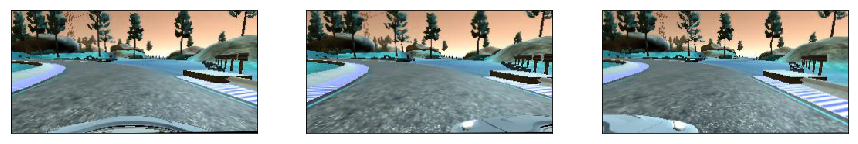

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def transform_image(x, rot_angle=0.05, shift=0.09):
    valPixels = 0.4
    image_shape = np.shape(x)
    rand_angle = np.random.uniform(rot_angle)-rot_angle/2.
    rand_shift_x = shift*np.random.uniform()-shift/2. 
    rand_shift_y = shift*np.random.uniform()-shift/2.
    
    #steering = steering + rand_shift_x/shift * 2 * valPixels

    rotate = cv2.getRotationMatrix2D((image_shape[1]/2,image_shape[0]/2),rand_angle,1.)
    trans = np.float32([[1,0,rand_shift_x],[0,1,rand_shift_y]])


    x = cv2.warpAffine(x,rotate,(image_shape[1],image_shape[0]))
    x = cv2.warpAffine(x,trans,(image_shape[1],image_shape[0]))
    return x

figure, axes = plt.subplots(1,3,figsize=(15,15), subplot_kw={'xticks': [], 'yticks': []})

image = cv2.imread("data/IMG/center_2016_12_01_13_31_13_482.jpg")
image = transform_image(image)
axes[0].imshow(image)

image = cv2.imread("data/IMG/left_2016_12_01_13_31_13_482.jpg")
image = transform_image(image)
axes[1].imshow(image)

image = cv2.imread("data/IMG/right_2016_12_01_13_31_13_482.jpg")
image = transform_image(image)
axes[2].imshow(image)
plt.show()



I used this training data for training the model. The validation set helped determine if the model was over or under fitting. I added couple of dropout to help with the overfitting. The ideal number of epochs was 3 as evidenced by fit_genrator method. I used an adam optimizer so that manually training the learning rate wasn't necessary.

youtube <a href="https://youtu.be/HcibQAIM6jI">link</a> of the driving.